# Plotting Glider DVL Data with Pandas and Seaborn

In [24]:
import pandas as pd
import seaborn as sns 
import numpy as np
import importlib
import pd0_reader
from matplotlib import pyplot as plt 
from PathfinderEnsemble import PathfinderEnsemble
from PathfinderTimeSeries import PathfinderTimeSeries
sns.set()

In [25]:
# read in a parsed DVL time-series from a .csv file
#   - the 'pd0_reader.py' parses raw .pd0 files and saves a time-series to .csv format
#   - use 'index_col' option when reading in csv file 
#   - use 'parse_dates' to reap the benefits of timestamp indexing
ts_csv = pd.read_csv('pd0-parsed/A-01820002.csv', index_col=0, parse_dates=True)

In [26]:
# display the first 5 columns of the time-series
ts_csv.head()

,time,ensemble_number,rtc_year,rtc_month,rtc_day,rtc_hour,rtc_minute,rtc_second,rtc_hundredths,ensemble_roll_over,...,btm_max_tracking_depth,btm_beam1_rssi,btm_beam2_rssi,btm_beam3_rssi,btm_beam4_rssi,btm_shallow_water_gain,btm_beam1_msb,btm_beam2_msb,btm_beam3_msb,btm_beam4_msb
2019-11-21 21:17:11.000018,1.574389e+09,1.0,19.0,11.0,21.0,21.0,17.0,11.0,18.0,0.0,...,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-11-21 21:17:14.000065,1.574389e+09,2.0,19.0,11.0,21.0,21.0,17.0,14.0,65.0,0.0,...,80.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0
2019-11-21 21:17:18.000090,1.574389e+09,3.0,19.0,11.0,21.0,21.0,17.0,18.0,90.0,0.0,...,80.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0
2019-11-21 21:17:22.000038,1.574389e+09,4.0,19.0,11.0,21.0,21.0,17.0,22.0,38.0,0.0,...,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-11-21 21:17:26.000082,1.574389e+09,5.0,19.0,11.0,21.0,21.0,17.0,26.0,82.0,0.0,...,80.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0


In [27]:
# # filter out data from a 20 minute window 
# ts_csv['2019-11-21 21:17:10':'2019-11-21 21:17:30']


# # extract columns of interest
# #  + timestamp displayed by default because the data is time-indexed
# #  + can select the time window that you want to examine
# ts_csv.loc['2019-11-21 21:18', ['pitch','roll']] 


# # example running boolean filter over the time-series 
# #   + filter out values that where all beams are not NaNs 
# #   + is a.isnull() or a.notna() instead of a == np.NaN
# ts_csv[
#     (ts_csv.bt_beam1_velocity.notna()) & 
#     (ts_csv.bt_beam2_velocity.notna()) & 
#     (ts_csv.bt_beam3_velocity.notna()) &
#     (ts_csv.bt_beam4_velocity.notna())
# ]

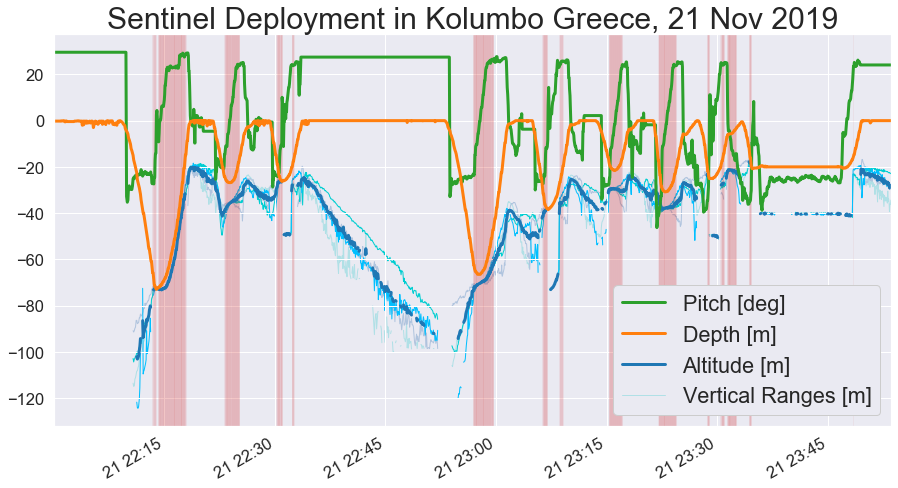

In [30]:
# sub-select time-window
ts_sub = ts_csv['2019-11-21 22:00':]

# pitch data
sns.set(font_scale = 1.5)
pitch     = ts_sub['pitch']
line_plot = pitch.plot(figsize=(15,8), linewidth=3, color='tab:green')

# depth data
depth     = -1 * ts_sub['depth_of_transducer']
line_plot = depth.plot(figsize=(15,8), linewidth=3, color='tab:orange')

# compute altitude estimate from the four vertical range estimates
# - does not account for pitch and roll of the vehicle 
h1 = ts_sub['btm_beam1_range']
h2 = ts_sub['btm_beam2_range']
h3 = ts_sub['btm_beam3_range']
h4 = ts_sub['btm_beam4_range']
altitude = depth - ((h1*h2)/(h1 + h2) + (h3*h4)/(h3 + h4))
altitude.plot(linewidth=3, color='tab:blue', zorder=1)

# bottom_track slant range data 
bt_ranges = ['btm_beam1_range','btm_beam2_range','btm_beam3_range','btm_beam4_range']
bt_colors = ['powderblue', 'darkturquoise', 'lightsteelblue', 'deepskyblue']
for i in range(len(bt_ranges)):
    bt_range  = depth - ts_sub[bt_ranges[i]]
    bt_range.plot(linewidth=1, color=bt_colors[i], zorder=0)

# plot moments in time where the glider gets dangerously close to bottom 
window = 5    # window is used to estimate the time between measurements (not constant during deployment)
danger = 20   # threshold for what is considered dangerously close to the bottom
danger = ts_sub[(ts_sub.btm_beam1_range < danger) & 
                (ts_sub.btm_beam2_range < danger) & 
                (ts_sub.btm_beam3_range < danger) & 
                (ts_sub.btm_beam4_range < danger)]
for time_stamp in danger.index:
    plt.axvspan(time_stamp, time_stamp + pd.Timedelta(seconds=window), color='tab:red', alpha=0.05)

# plotting labels 
plt.legend(['Pitch [deg]', 'Depth [m]', 'Altitude [m]', 'Vertical Ranges [m]'], fontsize='large', loc='lower right',framealpha=1)
plt.title('Sentinel Deployment in Kolumbo Greece, 21 Nov 2019', fontsize=30)

# saving the plot
plt.show()
fig = line_plot.get_figure()
fig.savefig("figs/bottom_track4")

In [2]:
# parsing time series directly in jupyter notebook allows for access 
importlib.reload(pd0_reader)
# ts = pd0_reader.pd0_reader('pd0-raw/sentinel/A-01820002.pd0', save=False)
ts.coordinate_transformation

print(ts.coordinate_transformation)
print(ts.sensor_source)
print(ts.heading_bias)
print(ts.heading_alignment)

NameError: name 'importlib' is not defined

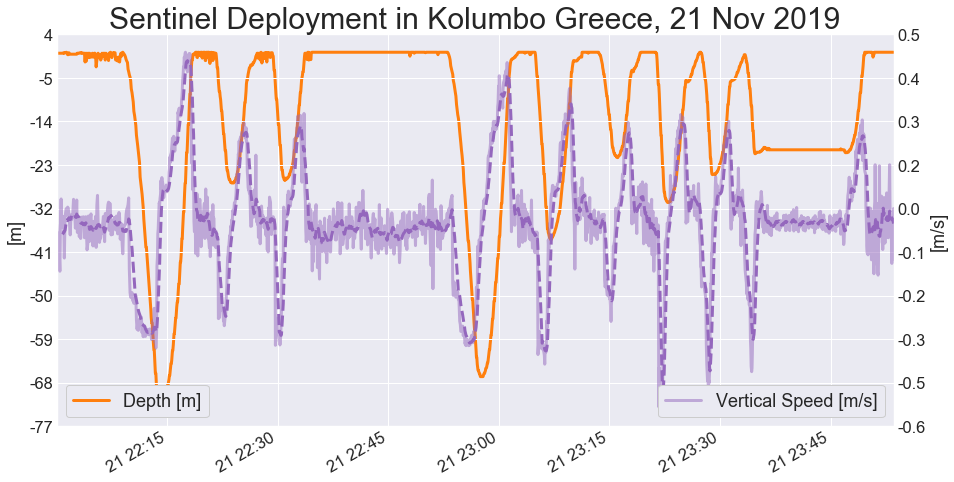

In [172]:
# sub-select time-window
ts_sub=  ts_csv['2019-11-21 22:00':]
pitch =  ts_sub['pitch']
depth = -ts_sub['depth_of_transducer']

# plot depth data
sns.set(font_scale = 1.5)
depth_plot = depth.plot(figsize=(15,8), linewidth=3, color='tab:orange')

# create twin plot and plot beam data 
speed_plot = depth_plot.twinx()
beam3_roll = beam3.rolling(10).mean()
beam3.plot(figsize=(15,8),      linewidth=3, alpha=0.5,  color='tab:purple')
beam3_roll.plot(figsize=(15,8), linewidth=3, style='--', color='tab:purple')

# plotting labels 
depth_plot.legend(['Depth [m]'],            fontsize='medium', loc='lower left',  framealpha=1)
speed_plot.legend(['Vertical Speed [m/s]'], fontsize='medium', loc='lower right', framealpha=1)
plt.title('Sentinel Deployment in Kolumbo Greece, 21 Nov 2019', fontsize=30)
depth_plot.set_ylabel('[m]')
speed_plot.set_ylabel('[m/s]')

# set axis and legend information
depth_plot.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(10))
speed_plot.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(10))
depth_plot.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.0f'))
speed_plot.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.1f'))
depth_plot.tick_params(axis='both', which='both', length=0)
speed_plot.tick_params(axis='both', which='both', length=0)

# saving the plot
plt.show()
fig = depth_plot.get_figure()
fig.savefig("figs/bottom_track6")

In [175]:
ts.system_configuration

16971